In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])

In [ ]:
x=df.drop(['CustomerID'],axis=1)
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
from sklearn.cluster import KMeans
#to find the no of clusters
wcss=[] #empty list
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42) #init - initializing k means algorithm
  model.fit(x)
  wcss.append(model.inertia_) #inertia_ finds variance

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[308862.06000000006, 212889.44245524303, 143391.59236035676, 104414.67534220168, 75427.71182424155, 58348.641363315044, 51575.2779310779, 44359.634641148325, 40942.51117006117, 37515.84125504126]


Text(0.5, 1.0, 'KMeans - elbow graph')

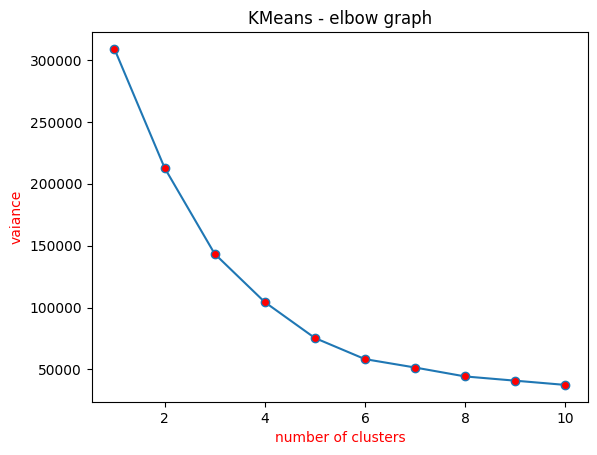

In [ ]:
plt.plot(range(1,11),wcss,marker='o',mfc='r')
plt.xlabel('number of clusters',color='r')
plt.ylabel('vaiance',color='r')
plt.title('KMeans - elbow graph')


graph is constant from 8 hence elbow point is 8 and no of clusters should be 8


In [ ]:
model1=KMeans(n_clusters=8,init='k-means++',random_state=42)
model1.fit(x)
y_pred=model1.predict(x)
y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 5,
       4, 3, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7], dtype=int32)

In [ ]:
#add output to dataframe
df['Output']=y_pred
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Output
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,7
196,197,0,45,126,28,6
197,198,1,32,126,74,7
198,199,1,32,137,18,6


In [ ]:
x=df.iloc[:,:-1].values
x

array([[  1,   1,  19,  15,  39],
       [  2,   1,  21,  15,  81],
       [  3,   0,  20,  16,   6],
       [  4,   0,  23,  16,  77],
       [  5,   0,  31,  17,  40],
       [  6,   0,  22,  17,  76],
       [  7,   0,  35,  18,   6],
       [  8,   0,  23,  18,  94],
       [  9,   1,  64,  19,   3],
       [ 10,   0,  30,  19,  72],
       [ 11,   1,  67,  19,  14],
       [ 12,   0,  35,  19,  99],
       [ 13,   0,  58,  20,  15],
       [ 14,   0,  24,  20,  77],
       [ 15,   1,  37,  20,  13],
       [ 16,   1,  22,  20,  79],
       [ 17,   0,  35,  21,  35],
       [ 18,   1,  20,  21,  66],
       [ 19,   1,  52,  23,  29],
       [ 20,   0,  35,  23,  98],
       [ 21,   1,  35,  24,  35],
       [ 22,   1,  25,  24,  73],
       [ 23,   0,  46,  25,   5],
       [ 24,   1,  31,  25,  73],
       [ 25,   0,  54,  28,  14],
       [ 26,   1,  29,  28,  82],
       [ 27,   0,  45,  28,  32],
       [ 28,   1,  35,  28,  61],
       [ 29,   0,  40,  29,  31],
       [ 30,  

In [ ]:
y=df.iloc[:,-1].values
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 5,
       4, 3, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [ ]:
from sklearn.svm import SVC
model2=SVC()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array([5, 3, 4, 0, 0, 5, 5, 0, 0, 5, 1, 0, 2, 5, 6, 2, 1, 0, 1, 5, 5, 4,
       0, 5, 5, 1, 5, 1, 2, 5, 3, 4, 1, 5, 0, 1, 2, 2, 0, 1, 1, 2, 4, 4,
       5, 7, 3, 3, 2, 1, 5, 2, 3, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred2)
score


0.95